In [2]:
from datetime import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

In [3]:
data = pd.read_csv('Philly_weather.csv')  
data.dropna(inplace=True)

In [4]:
data.shape

(44625, 7)

In [5]:
data.head(10)

,datetime,humidity,pressure,temperature,wind-direction,wind-speed,weather-description
0,2012-10-01 13:00:00,71.0,1014.0,285.630000,270.0,4.0,broken clouds
1,2012-10-01 14:00:00,70.0,1014.0,285.663208,270.0,4.0,broken clouds
2,2012-10-01 15:00:00,70.0,1014.0,285.756824,271.0,3.0,broken clouds
3,2012-10-01 16:00:00,69.0,1014.0,285.850440,272.0,3.0,broken clouds
4,2012-10-01 17:00:00,69.0,1014.0,285.944057,274.0,3.0,broken clouds
5,2012-10-01 18:00:00,68.0,1014.0,286.037673,275.0,3.0,broken clouds
6,2012-10-01 19:00:00,68.0,1014.0,286.131290,276.0,3.0,broken clouds
7,2012-10-01 20:00:00,67.0,1014.0,286.224906,277.0,3.0,broken clouds
8,2012-10-01 21:00:00,67.0,1014.0,286.318522,279.0,3.0,broken clouds
9,2012-10-01 22:00:00,66.0,1014.0,286.412139,280.0,3.0,broken clouds


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44625 entries, 0 to 44624
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             44625 non-null  object 
 1   humidity             44625 non-null  float64
 2   pressure             44625 non-null  float64
 3   temperature          44625 non-null  float64
 4   wind-direction       44625 non-null  float64
 5   wind-speed           44625 non-null  float64
 6   weather-description  44625 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.7+ MB


In [7]:
data["day"] = pd.to_datetime(data['datetime'], format='%Y-%m-%d').dt.day

In [8]:
data.head(20)

,datetime,humidity,pressure,temperature,wind-direction,wind-speed,weather-description,day
0,2012-10-01 13:00:00,71.0,1014.0,285.630000,270.0,4.0,broken clouds,1
1,2012-10-01 14:00:00,70.0,1014.0,285.663208,270.0,4.0,broken clouds,1
2,2012-10-01 15:00:00,70.0,1014.0,285.756824,271.0,3.0,broken clouds,1
3,2012-10-01 16:00:00,69.0,1014.0,285.850440,272.0,3.0,broken clouds,1
4,2012-10-01 17:00:00,69.0,1014.0,285.944057,274.0,3.0,broken clouds,1
5,2012-10-01 18:00:00,68.0,1014.0,286.037673,275.0,3.0,broken clouds,1
6,2012-10-01 19:00:00,68.0,1014.0,286.131290,276.0,3.0,broken clouds,1
7,2012-10-01 20:00:00,67.0,1014.0,286.224906,277.0,3.0,broken clouds,1
8,2012-10-01 21:00:00,67.0,1014.0,286.318522,279.0,3.0,broken clouds,1
9,2012-10-01 22:00:00,66.0,1014.0,286.412139,280.0,3.0,broken clouds,1


In [9]:
x_train, x_test, y_train, y_test = train_test_split(data, data.temperature)

In [10]:
x_train_date = x_train.datetime
x_test_data = x_test.temperature

In [11]:
print(x_train_date)

43153    2017-09-29 17:00:00
35989    2016-12-05 05:00:00
29100    2016-02-21 11:00:00
31033    2016-05-12 02:00:00
3139     2013-02-17 18:00:00
                ...         
25339    2015-09-17 18:00:00
27420    2015-12-13 11:00:00
33666    2016-08-29 20:00:00
28291    2016-01-18 18:00:00
32340    2016-07-05 13:00:00
Name: datetime, Length: 33468, dtype: object


In [12]:
x_train

,datetime,humidity,pressure,temperature,wind-direction,wind-speed,weather-description,day
43153,2017-09-29 17:00:00,39.0,1018.0,291.880000,320.0,2.0,scattered clouds,29
35989,2016-12-05 05:00:00,69.0,1019.0,277.870000,203.0,1.0,broken clouds,5
29100,2016-02-21 11:00:00,87.0,1019.0,277.194843,266.0,2.0,sky is clear,21
31033,2016-05-12 02:00:00,82.0,1021.0,287.970000,190.0,2.0,mist,12
3139,2013-02-17 18:00:00,48.0,1013.0,275.910000,360.0,4.0,overcast clouds,17
...,...,...,...,...,...,...,...,...
25339,2015-09-17 18:00:00,28.0,1020.0,301.730000,240.0,3.0,few clouds,17
27420,2015-12-13 11:00:00,89.0,1027.0,283.141093,246.0,1.0,scattered clouds,13
33666,2016-08-29 20:00:00,43.0,1018.0,305.380000,340.0,2.0,sky is clear,29
28291,2016-01-18 18:00:00,49.0,1013.0,268.460000,290.0,5.0,sky is clear,18


In [14]:
x_train = x_train.drop(["datetime", "temperature", "weather-description"], axis = 1)

In [15]:
x_test = x_test.drop(["datetime", "temperature", "weather-description"], axis = 1)

In [16]:
x_train

,humidity,pressure,wind-direction,wind-speed,day
43153,39.0,1018.0,320.0,2.0,29
35989,69.0,1019.0,203.0,1.0,5
29100,87.0,1019.0,266.0,2.0,21
31033,82.0,1021.0,190.0,2.0,12
3139,48.0,1013.0,360.0,4.0,17
...,...,...,...,...,...
25339,28.0,1020.0,240.0,3.0,17
27420,89.0,1027.0,246.0,1.0,13
33666,43.0,1018.0,340.0,2.0,29
28291,49.0,1013.0,290.0,5.0,18


In [17]:
regr = LinearRegression()
#regr.fit(np.array(x_train).reshape(-1,1), y_train)
regr.fit(x_train, y_train)

LinearRegression()

In [18]:
#preds = regr.predict(np.array(x_test).reshape(-1,1))
preds = regr.predict(x_test)

In [19]:
print(regr.score(x_test, y_test))

0.12412331638464702


In [20]:
print(regr.score(x_train, y_train))

0.12852407133877575


In [36]:
train_score = regr.score(x_train, y_train)

test_score = regr.score(x_test, y_test)

r2 = r2_score(y_test, preds)

mse = mean_squared_error(y_test, preds)

rmse = np.sqrt(mse)

print(f"The score of the training data set is: {round(train_score, 4)}")
print(f"The score of the testing data set is: {round(test_score, 4)}")
print(f"The r2 score of testing data compared to the predicted data is: {round(r2, 4)}")
print(f"The mse of testing data compared to the predicted data is: {round(mse, 4)}")
print(f"The rmse of testing data compared to the predicted data is: {round(rmse, 4)}")

The score of the training data set is: 0.1285
The score of the testing data set is: 0.1241
The r2 score of testing data compared to the predicted data is: 0.1241
The mse of testing data compared to the predicted data is: 92.6434
The rmse of testing data compared to the predicted data is: 9.6251


In [21]:
y_test.head(20)

40588    300.540000
14314    286.871787
23262    296.631667
29606    284.530000
6177     303.550000
7759     294.470000
42825    295.480000
35345    273.500000
29703    282.460000
35450    281.460000
3336     279.300000
35149    281.850000
29314    278.408895
38565    275.880000
9724     277.000000
4202     284.580000
30670    297.250790
7611     297.288333
26074    274.150000
38345    265.790000
Name: temperature, dtype: float64

In [22]:
y_train.head(20)

43153    291.880000
35989    277.870000
29100    277.194843
31033    287.970000
3139     275.910000
4565     288.230000
22342    293.735000
11109    278.750000
35706    273.070000
11335    268.630000
8528     289.746667
24221    294.010000
37021    276.010000
21589    290.268000
1539     271.220000
23503    290.440000
25834    284.020000
5460     289.390000
34888    294.108900
39217    290.150000
Name: temperature, dtype: float64

In [23]:
preds

array([289.02692393, 281.94503842, 283.37200453, ..., 283.86766427,
       286.39621363, 287.46684559])

In [24]:
residuals = preds - y_test

(array([  22.,  509., 1774., 2490., 2138., 2090., 1499.,  549.,   72.,
          14.]),
 array([-27.07979035, -21.00791493, -14.9360395 ,  -8.86416408,
         -2.79228865,   3.27958677,   9.3514622 ,  15.42333762,
         21.49521305,  27.56708847,  33.6389639 ]),
 <BarContainer object of 10 artists>)

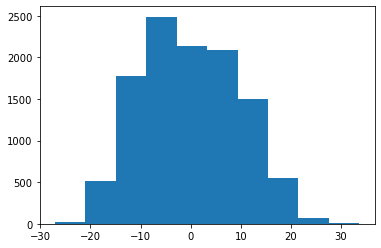

In [25]:
plt.hist(residuals)

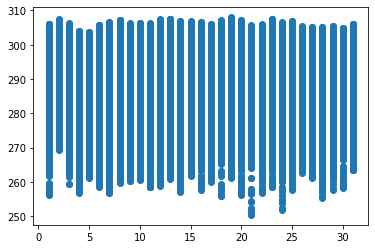

In [28]:
data['day_of_year'] = data.day
plt.scatter(data['day_of_year'], data.temperature)
#plt.plot(data['day_of_year'], preds, color='red')

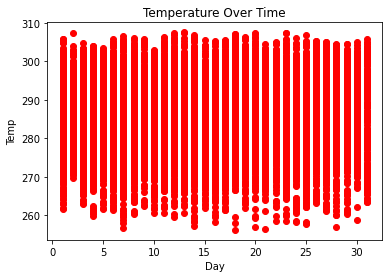

In [33]:
plt.scatter(x_test.day, y_test, color = "red")
plt.title("Temperature Over Time")
plt.xlabel("Day")
plt.ylabel("Temp")
plt.show()

In [35]:
#score = regr.score(data.day, data.temperature)
#r2 = r2_score(y, preds)

#print(f"Score: {score}, r2: {r2}")

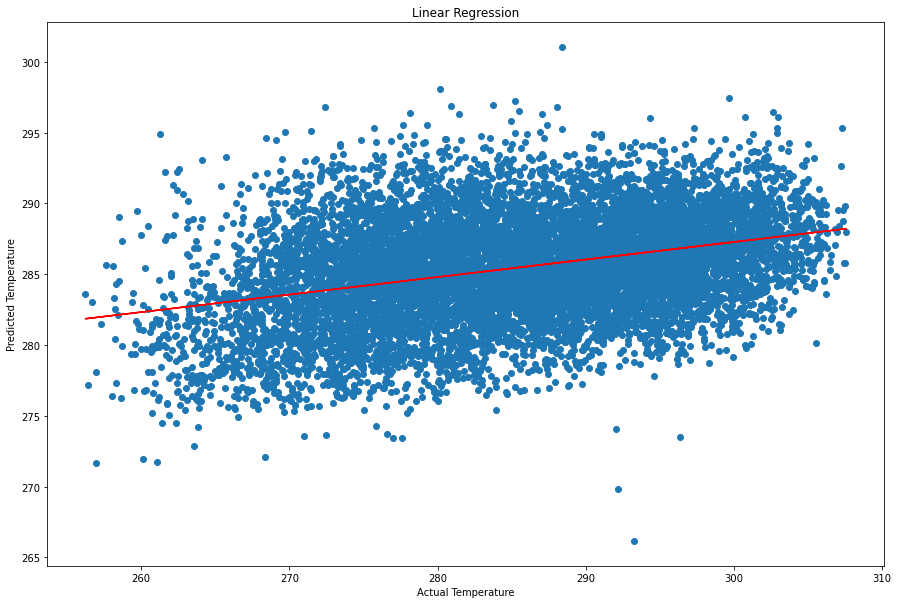

In [40]:
plt.figure(figsize = (15,10))
plt.title("Linear Regression")
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.scatter(y_test, preds)
x = np.array(y_test)
y = preds
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')